In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
reader = pd.read_csv(
    r"https://docs.google.com/spreadsheets/d/e/2PACX-1vT1hvzdsWO91pFdKb_i36aYT7sLsABv0vSStxF8axgArgNnEnNQa1uauOzYhJqsPumSlN089dxFq-_V/pub?gid=476871487&single=true&output=csv",
    iterator=True,
    chunksize=1_000,
    dtype={"Sleep":"category"}
    )

df = pd.concat(reader, ignore_index=True)

In [222]:
df.head()

,Age,Gender,Parental_Edu,Income,Prev_Grade,Attendance,Study_Hrs,Motivation,Stress,Social_Media,Sleep,Final_Grade
0,22,M,Bachelor's,Medium,94,0.94,3.7,High,Medium,2.7,8,A
1,19,F,PhD,Low,98,0.90,4.0,Medium,High,2.3,6,A
2,23,M,Master's,High,55,0.80,4.6,Medium,Low,2.2,8,A
3,20,F,High School,Low,54,0.87,2.6,High,High,3.3,6,B
4,22,M,High School,High,56,0.86,4.5,Low,Low,1.3,4,B


In [223]:
print("Solo a modo de Juego y de aprendizaje")
for col in ["Gender", "Sleep","Study_Hrs"]:
    n_rows = len(df)
    porcentaje = np.random.uniform(0.05, 0.15)
    n_eliminar = int(porcentaje * n_rows)
    
    indices_a_eliminar = np.random.choice(df.index, size=n_eliminar, replace=False)
    
    df.loc[indices_a_eliminar, col] = np.nan

Solo a modo de Juego y de aprendizaje


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           5000 non-null   int64   
 1   Gender        4293 non-null   object  
 2   Parental_Edu  5000 non-null   object  
 3   Income        5000 non-null   object  
 4   Prev_Grade    5000 non-null   int64   
 5   Attendance    5000 non-null   float64 
 6   Study_Hrs     4303 non-null   float64 
 7   Motivation    5000 non-null   object  
 8   Stress        5000 non-null   object  
 9   Social_Media  5000 non-null   float64 
 10  Sleep         4381 non-null   category
 11  Final_Grade   5000 non-null   object  
dtypes: category(1), float64(3), int64(2), object(6)
memory usage: 434.9+ KB


# Listar cada columna

| **Columna**      | **Tipo de dato** | **Descripción sugerida**                                                                            |
| ---------------- | ---------------- | --------------------------------------------------------------------------------------------------- |
| **Age**          | `float64`        | Edad del estudiante (en años).                                                                      |
| **Gender**       | `object`         | Género del estudiante (por ejemplo: “Male”, “Female”, “Other”).                                     |
| **Parental_Edu** | `object`         | Nivel educativo de los padres (por ejemplo: “High School”, “Bachelor’s”, “Master’s”).               |
| **Income**       | `object`         | Nivel o categoría de ingresos familiares (puede estar representado como texto o rangos de ingreso). |
| **Prev_Grade**   | `float64`        | Nota o calificación promedio anterior del estudiante.                                               |
| **Attendance**   | `float64`        | Porcentaje de asistencia del estudiante a clases.                                                   |
| **Study_Hrs**    | `float64`        | Número promedio de horas de estudio diarias o semanales.                                            |
| **Motivation**   | `object`         | Nivel de motivación del estudiante (por ejemplo: “High”, “Medium”, “Low”).                          |
| **Stress**       | `object`         | Nivel de estrés percibido por el estudiante (por ejemplo: “Low”, “Moderate”, “High”).               |
| **Social_Media** | `float64`        | Promedio de horas diarias dedicadas al uso de redes sociales.                                       |
| **Sleep**        | `float64`        | Promedio de horas de sueño diarias.                                                                 |
| **Final_Grade**  | `object`         | Calificación final o rendimiento académico final (posiblemente en categorías o letras).             |


---

In [225]:
df.columns = df.columns.str.lower()

# Abstract

Este estudio analiza los factores que influyen en el rendimiento académico de estudiantes, examinando variables demográficas, hábitos de estudio, bienestar psicológico y comportamientos cotidianos. El dataset incluye información sobre edad, género, nivel educativo parental, ingresos familiares, calificaciones previas, asistencia, horas de estudio, motivación, niveles de estrés, uso de redes sociales, horas de sueño y calificación final. El objetivo principal es identificar patrones y relaciones significativas que permitan comprender mejor los determinantes del éxito académico y proporcionar insights para intervenciones educativas efectivas.


*viz de los valores nulls*

In [226]:
import missingno as msno

<Axes: >

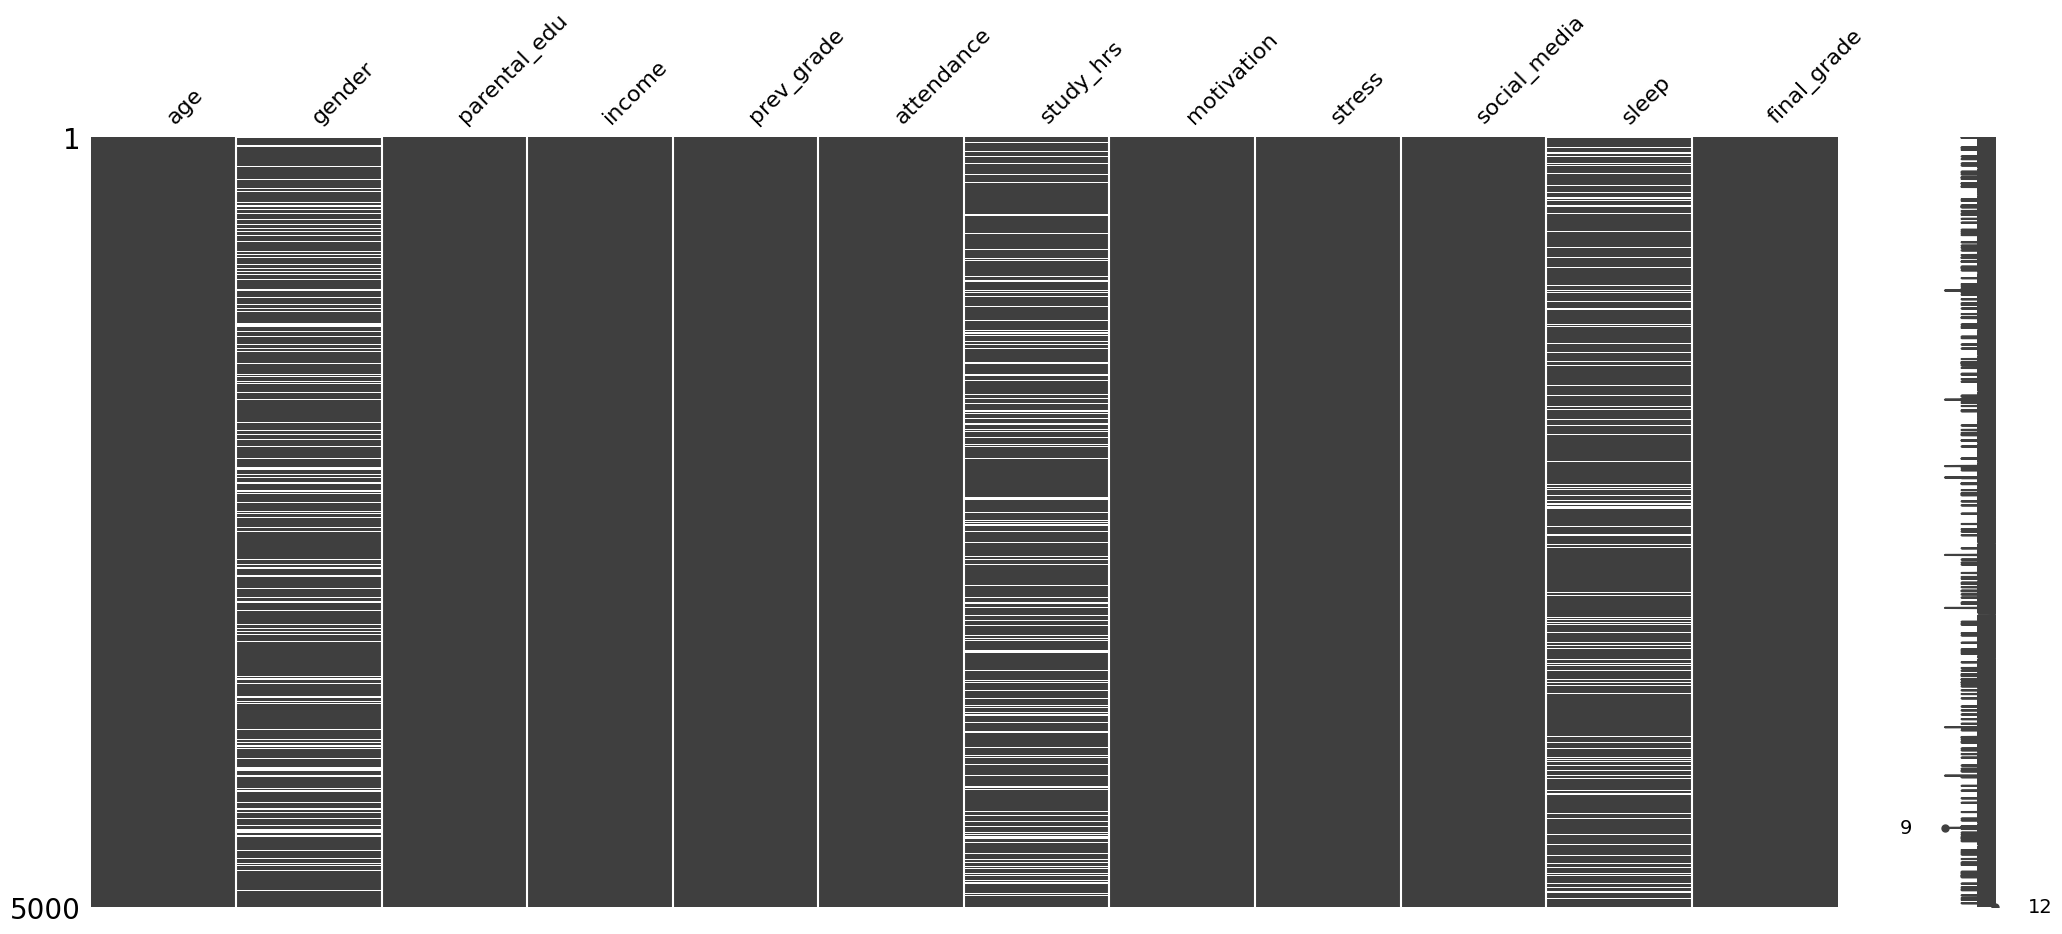

In [227]:
msno.matrix(df)

In [228]:
import pandas as pd
import numpy as np

def calcular_porcentaje_nulls(df: pd.DataFrame) -> None:
    print("Observación de porcentaje de nulls")
    
    # Porcentaje de nulos por columna
    null_counts = df.isna().mean() * 100
    
    # Columnas que tienen al menos un null
    columnas_nulas = null_counts[null_counts > 0].index
    
    # Crear DataFrame con resultado
    df_resultado = pd.DataFrame({
        "columna": columnas_nulas,
        "porcentaje_nulls": null_counts[columnas_nulas],
        "tipo_de_dato": df.dtypes[columnas_nulas].astype(str)
    }).sort_values(by="porcentaje_nulls", ascending=False)
    
    # Transponer y formatear porcentajes
    df_transpuesto = df_resultado.set_index("columna").T
    df_transpuesto = df_transpuesto.map(lambda x: "{:.2f} %".format(x) if isinstance(x, (float, np.floating)) else x)
    
    # Mostrar
    print(df_transpuesto.to_string(index=True))

# Uso
calcular_porcentaje_nulls(df)


Observación de porcentaje de nulls
columna            gender study_hrs     sleep
porcentaje_nulls  14.14 %   13.94 %   12.38 %
tipo_de_dato       object   float64  category


In [229]:
categoricas = df.select_dtypes(include=["object","category"])
categoricas.head()

,gender,parental_edu,income,motivation,stress,sleep,final_grade
0,M,Bachelor's,Medium,High,Medium,8,A
1,F,PhD,Low,Medium,High,6,A
2,M,Master's,High,Medium,Low,8,A
3,NaN,High School,Low,High,High,NaN,B
4,M,High School,High,Low,Low,4,B


In [230]:
def plot_categoricas(df, columnas, hue=None, n_cols=3):
    n_rows = (len(columnas) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        sns.countplot(
            data=df,
            x=col,
            hue=hue,
            order=df[col].value_counts().index,
            ax=axes[i]
        )
        axes[i].set_title(f"Distribución de {col}" + (f" vs {hue}" if hue else ""))
        axes[i].set_ylabel("Conteo")
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Eliminar ejes vacíos
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


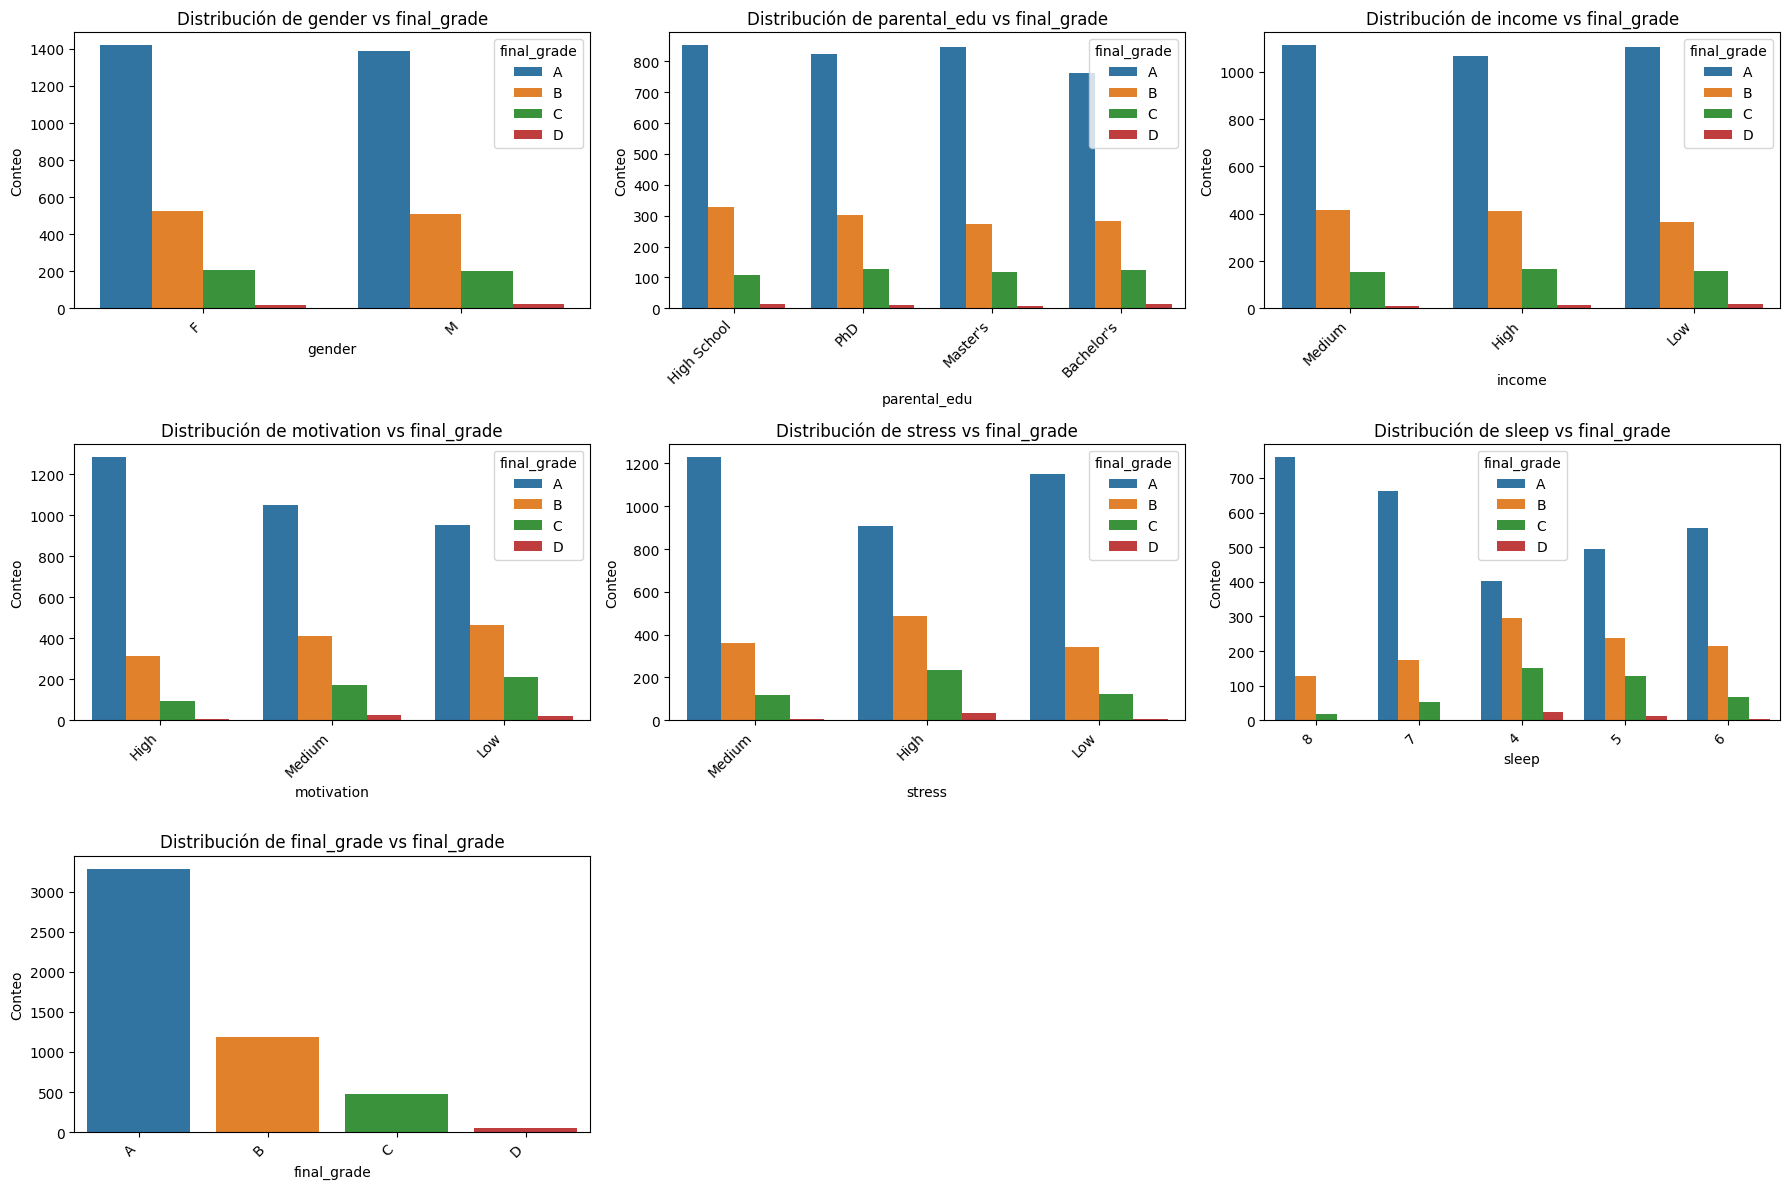

In [231]:
plot_categoricas(df, categoricas.columns,hue="final_grade")

In [232]:
numericas = df.select_dtypes(include="number")
numericas

,age,prev_grade,attendance,study_hrs,social_media
0,22,94,0.94,3.7,2.7
1,19,98,0.90,4.0,2.3
2,23,55,0.80,4.6,2.2
3,20,54,0.87,2.6,3.3
4,22,56,0.86,4.5,1.3
...,...,...,...,...,...
4995,22,76,0.97,5.3,4.1
4996,16,97,0.75,1.1,1.0
4997,18,71,0.94,2.5,3.3
4998,19,83,0.84,6.0,2.6


In [233]:

def plot_numericas(df, columnas, hue=None, n_cols=3, kind="hist", orient="h"):

    n_rows = (len(columnas) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        if kind == "hist":
            sns.histplot(data=df, x=col, hue=hue, kde=True, ax=axes[i], multiple="stack")
            axes[i].set_ylabel("Frecuencia")
        elif kind == "box":
            sns.boxplot(
                data=df, 
                x=col, 
                y=hue if hue else None, 
                orient=orient, 
                ax=axes[i]
            )
            axes[i].set_xlabel(col)
        elif kind == "violin":
            sns.violinplot(
                data=df, 
                x=col, 
                y=hue if hue else None, 
                orient=orient, 
                ax=axes[i]
            )
            axes[i].set_xlabel(col)

        axes[i].set_title(f"{kind.capitalize()} de {col}" + (f" vs {hue}" if hue else ""))

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


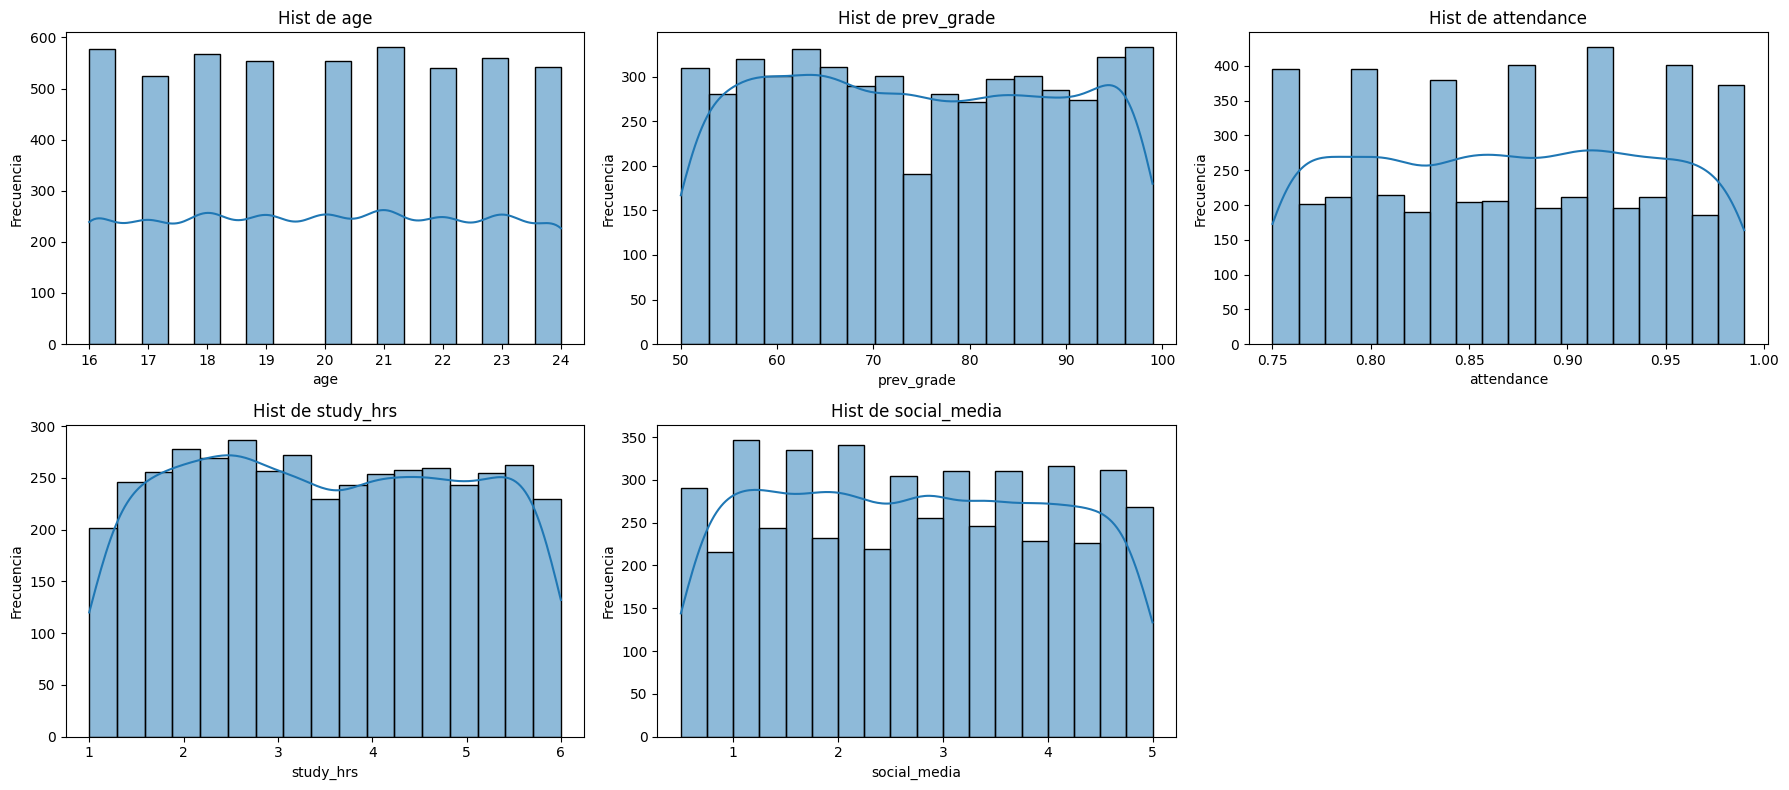

In [234]:
plot_numericas(df, numericas.columns, kind="hist")

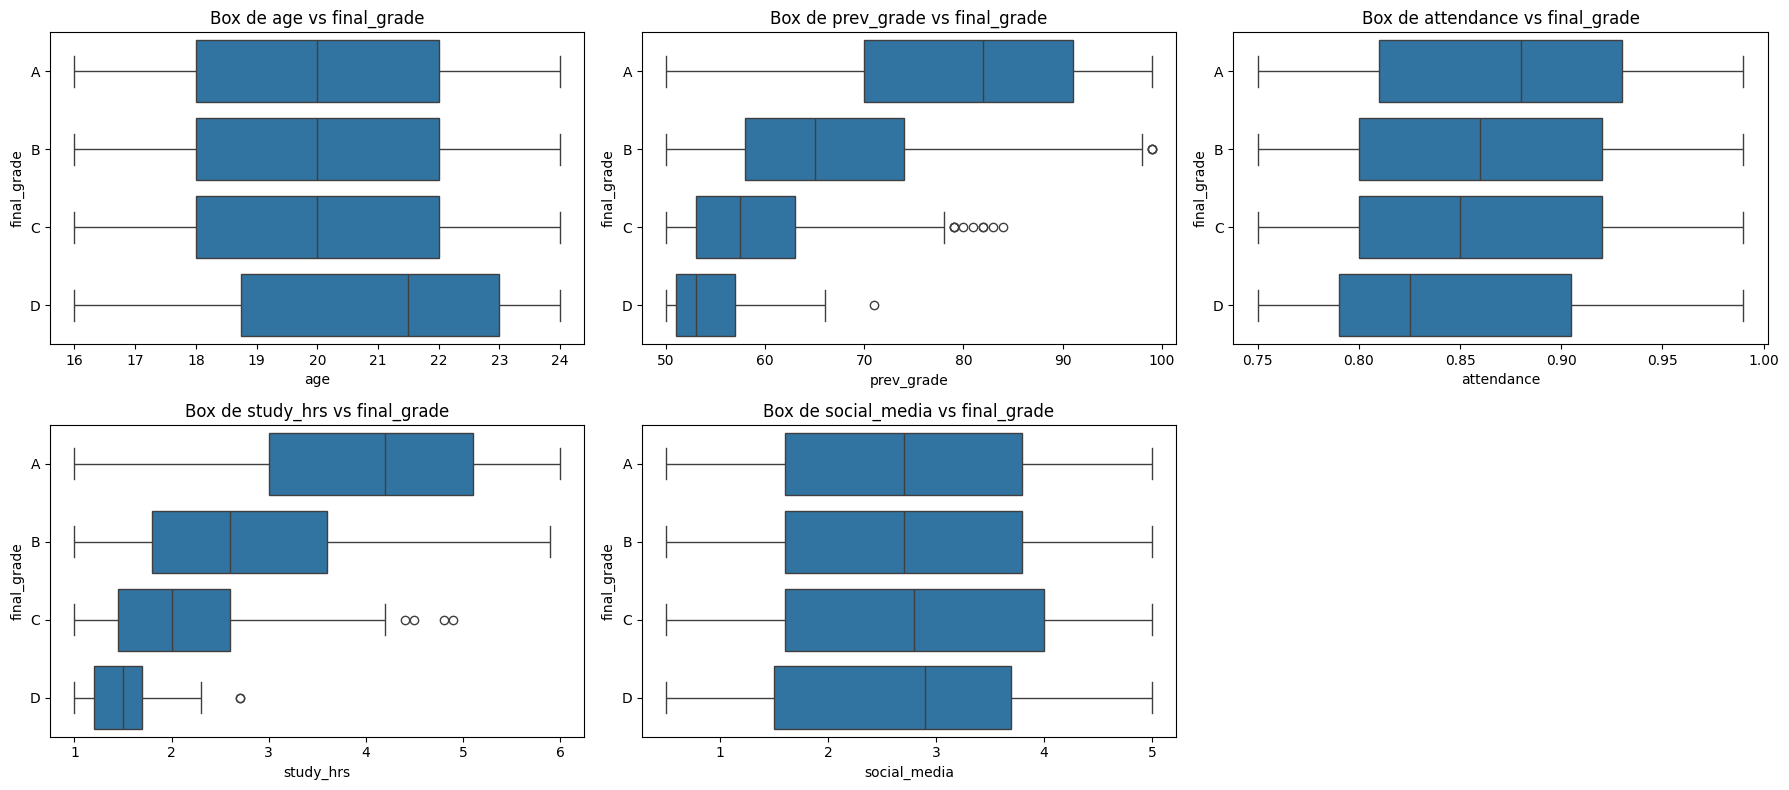

In [235]:
plot_numericas(df, numericas.columns, hue="final_grade", kind="box")

## Imputacion 

| Columna   | % Nulls | Tipo     |
| --------- | ------- | -------- |
| study_hrs | 10.82   | float64  |
| sleep     | 5.72    | category |
| gender    | 5.02    | object   |


###  Observaciones

* Los porcentajes de nulls son relativamente bajos (<11%), por lo que **imputaciones simples** suelen ser suficientes.
* Para un análisis exploratorio o modelos sencillos, **media/mediana para numéricas y moda para categóricas** es suficiente.
* Si vas a usar modelos predictivos más sensibles a valores faltantes, considera **KNN o IterativeImputer** para mejorar la precisión.


In [236]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer


In [237]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categoricas.columns] = pd.DataFrame(cat_imputer.fit_transform(df[categoricas.columns]), columns=categoricas.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   gender        5000 non-null   object 
 2   parental_edu  5000 non-null   object 
 3   income        5000 non-null   object 
 4   prev_grade    5000 non-null   int64  
 5   attendance    5000 non-null   float64
 6   study_hrs     4303 non-null   float64
 7   motivation    5000 non-null   object 
 8   stress        5000 non-null   object 
 9   social_media  5000 non-null   float64
 10  sleep         5000 non-null   object 
 11  final_grade   5000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 468.9+ KB


In [238]:
study_hrs = df[numericas.columns]

# Probar distintas configuraciones de max_iter
iter_options = [1,2,3, 20]  # número de iteraciones del algoritmo
results_iter = {}

for it in iter_options:
    imputer = IterativeImputer(max_iter=it, random_state=0)
    imputed = imputer.fit_transform(study_hrs)
    study_hrs_imputed = pd.DataFrame(imputed, columns=study_hrs.columns)
    
    imputed_values = study_hrs_imputed.loc[study_hrs['study_hrs'].isna(), 'study_hrs']
    results_iter[it] = {
        'imputed_values': imputed_values.values,
        'mean': imputed_values.mean(),
        'std': imputed_values.std()
    }

# Mostrar resultados
for it, v in results_iter.items():
    print(f"max_iter={it} -> imputed: {len(v['imputed_values'])}, mean={v['mean']:.2f}, std={v['std']:.2f}")

# Imputar numéricas con IterativeImputer usando la mejor opción
best_iter = max(results_iter, key=lambda k: results_iter[k]['mean'])  # por ejemplo
num_imputer = IterativeImputer(max_iter=best_iter, random_state=0)

max_iter=1 -> imputed: 697, mean=3.50, std=0.00
max_iter=2 -> imputed: 697, mean=3.50, std=0.00
max_iter=3 -> imputed: 697, mean=3.50, std=0.00
max_iter=20 -> imputed: 697, mean=3.50, std=0.00


In [239]:
df[numericas.columns] = pd.DataFrame(num_imputer.fit_transform(df[numericas.columns]), columns=numericas.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   float64
 1   gender        5000 non-null   object 
 2   parental_edu  5000 non-null   object 
 3   income        5000 non-null   object 
 4   prev_grade    5000 non-null   float64
 5   attendance    5000 non-null   float64
 6   study_hrs     5000 non-null   float64
 7   motivation    5000 non-null   object 
 8   stress        5000 non-null   object 
 9   social_media  5000 non-null   float64
 10  sleep         5000 non-null   object 
 11  final_grade   5000 non-null   object 
dtypes: float64(5), object(7)
memory usage: 468.9+ KB


<Axes: >

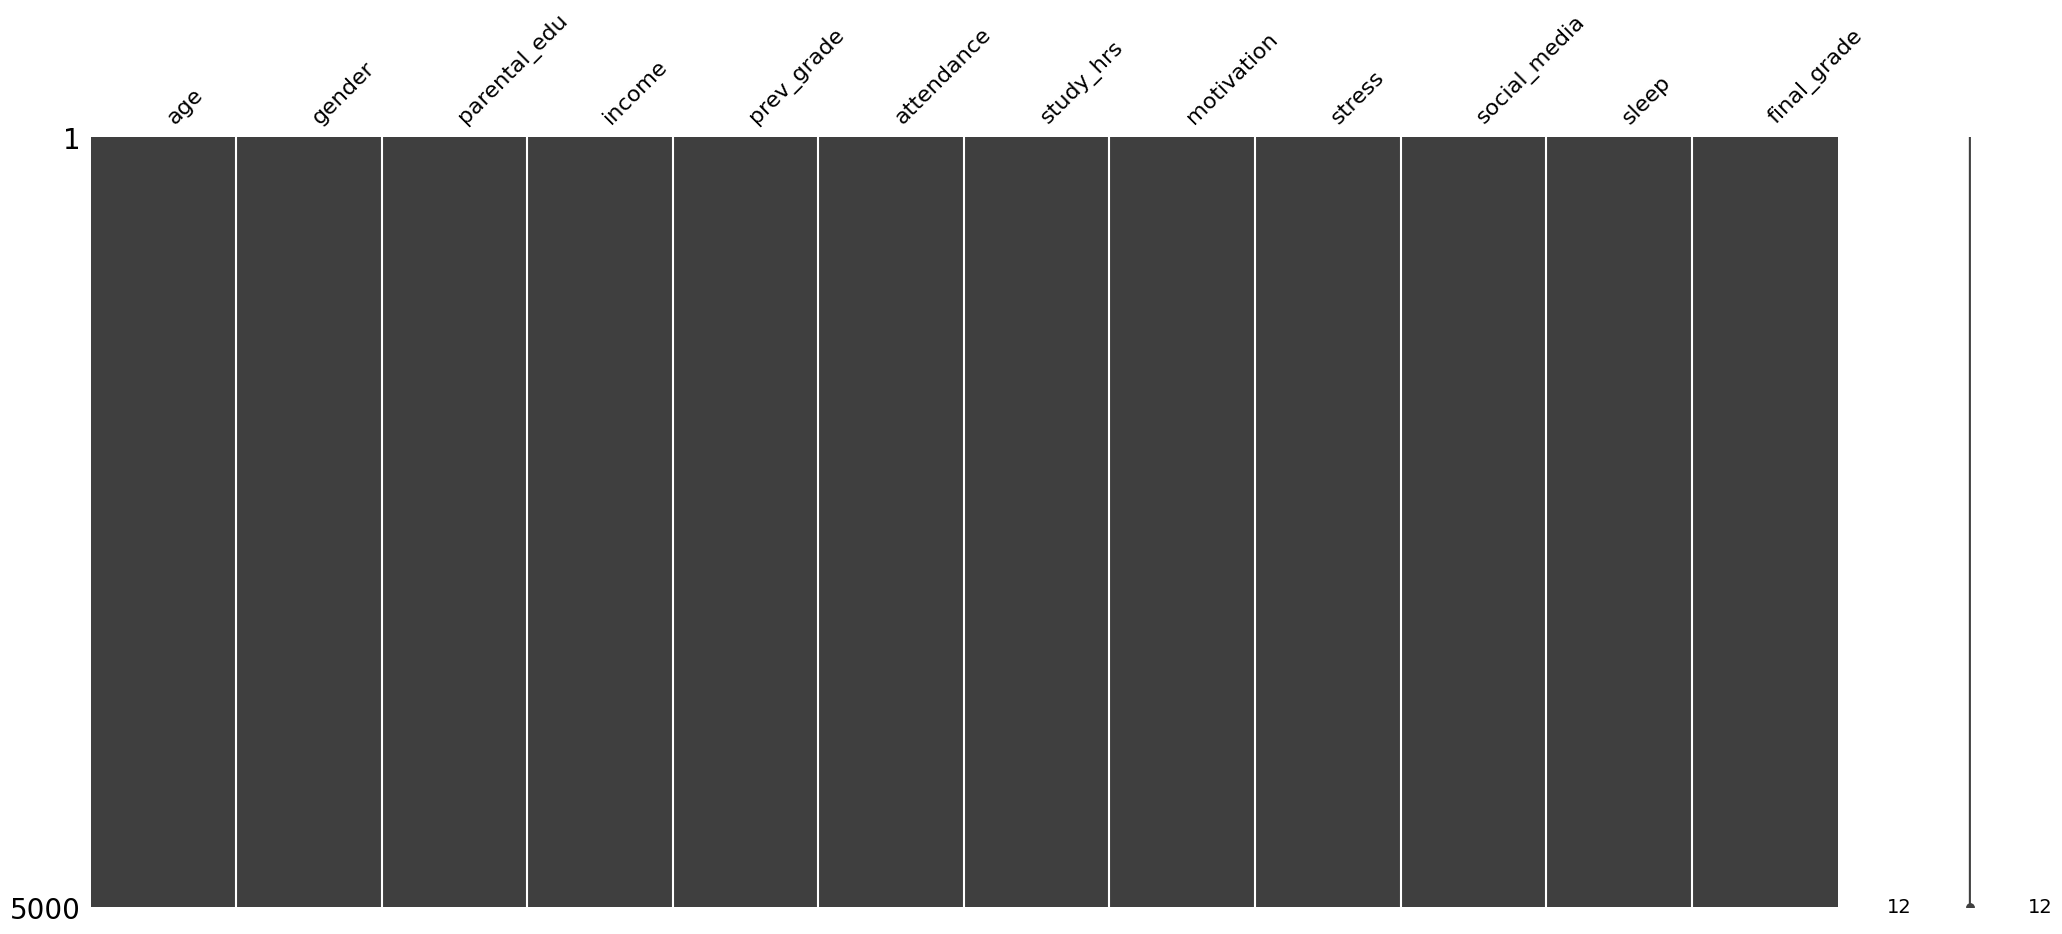

In [240]:
msno.matrix(df)

### Outliers

In [241]:
def detect_outliers_iqr(df, col, group_col):
    outliers = pd.Series(False, index=df.index)
    for g in df[group_col].unique():
        subset = df[df[group_col] == g][col]
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers |= (df[col] < lower_bound) & (df[group_col] == g)
        outliers |= (df[col] > upper_bound) & (df[group_col] == g)
    return outliers

_prev_grade vs final_grade:_

* Hay varios puntos atípicos, especialmente en las notas C y D.
* Esto indica que algunos estudiantes con prev_grade relativamente altos obtuvieron una nota baja (y viceversa).

_study_hrs vs final_grade:_

* Algunos outliers aparecen en C y D, probablemente estudiantes que estudian mucho y aún así obtienen bajas calificaciones, o que estudian poco y aún así sacan altas notas.

In [242]:
outliers_prev = detect_outliers_iqr(df, 'prev_grade', 'final_grade')
outliers_study = detect_outliers_iqr(df, 'study_hrs', 'final_grade')


In [243]:
print("Total outliers Prev_Grade vs Final_Grade:", outliers_prev.sum())
print("Total outliers Study_Hrs vs Final_Grade:", outliers_study.sum())

Total outliers Prev_Grade vs Final_Grade: 13
Total outliers Study_Hrs vs Final_Grade: 15


In [244]:
# Análisis resumido por Final_Grade
sesgo_analysis = df.groupby('final_grade').agg({
    'prev_grade': ['count', 'skew'],
    'study_hrs': ['skew']
}).round(3)

print(sesgo_analysis)

            prev_grade        study_hrs
                 count   skew      skew
final_grade                            
A                 3286 -0.406    -0.259
B                 1188  0.567     0.329
C                  478  0.984     0.333
D                   48  1.380     1.234


In [245]:
def cap_outliers_iqr(df, col, group_col, factor_dict=None):
    df_copy = df.copy()
    if factor_dict is None:
        factor_dict = {}
    
    for cat in df_copy[group_col].unique():
        mask = df_copy[group_col] == cat
        series = df_copy.loc[mask, col]
        
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        
        factor = factor_dict.get(cat, 1.5)
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        
        df_copy.loc[mask, col] = series.clip(lower=lower, upper=upper)
    
    return df_copy


In [246]:

def winsorize(df, col, group_col, lower_dict, upper_dict):
    df_copy = df.copy()

    for cat in df_copy[group_col].unique():
        mask = df_copy[group_col] == cat
        series = df_copy.loc[mask, col]
        
        # Percentiles
        lower_pct = lower_dict.get(cat, 0.0)
        upper_pct = upper_dict.get(cat, 0.0)
        lower_val = series.quantile(lower_pct)
        upper_val = series.quantile(upper_pct)
        
        
        df_copy.loc[mask, col] = series.clip(lower=lower_val, upper=upper_val)
    return df_copy


In [247]:
factor_limits = {'A': 1.5, 'B': 1.5, 'C': 1.0, 'D': 0.8}

In [248]:
# Límites según categoría
lower_limits = {'A': 0.05, 'B': 0.05, 'C': 0.0, 'D': 0.0}  # percentil inferior
upper_limits = {'A': 0.95, 'B': 0.95, 'C': 0.90, 'D': 0.85} # percentil superior


df_clean = df.copy()

df_clean = cap_outliers_iqr(df_clean, 'prev_grade', 'final_grade', factor_limits)
df_clean = winsorize(df_clean, 'study_hrs', 'final_grade', lower_limits, upper_limits)


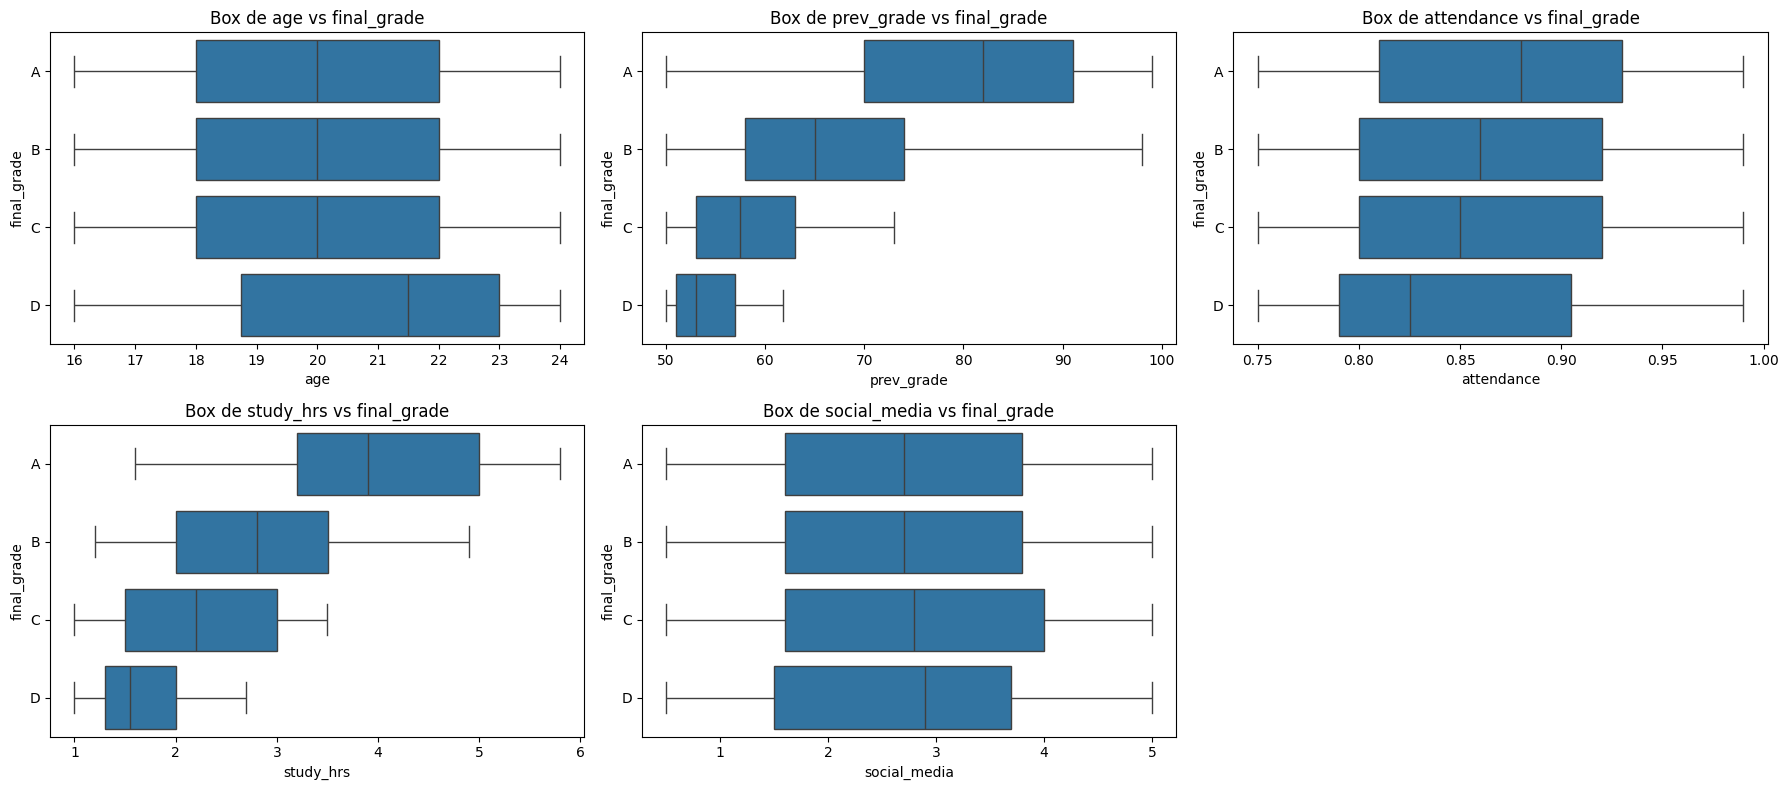

In [249]:
plot_numericas(df_clean, numericas.columns, hue="final_grade", kind="box")


## Hipótesis para Análisis

### Análisis Univariado

**Distribución de características individuales:**
1. La distribución de horas de estudio seguirá un patrón normal con mayoría de estudiantes en rangos moderados (2-4 horas diarias)
2. La asistencia mostrará una distribución sesgada hacia valores altos (>80%)
3. El nivel de motivación presentará mayor frecuencia en categorías "Medium" y "High"
4. Las horas de sueño se concentrarán entre 6-8 horas diarias
5. El nivel educativo parental mostrará mayor representación en educación media superior

### Análisis Bivariado

**Relaciones entre dos variables:**
1. **Estudio vs Rendimiento:** Estudiantes con más horas de estudio tendrán mejores calificaciones finales
2. **Asistencia vs Notas:** Mayor porcentaje de asistencia se correlacionará positivamente con mejores calificaciones
3. **Estrés vs Rendimiento:** Niveles moderados de estrés estarán asociados con mejor rendimiento que niveles muy altos o muy bajos
4. **Sueño vs Rendimiento:** Estudiantes con 7-8 horas de sueño tendrán mejor rendimiento que aquellos con sueño insuficiente o excesivo
5. **Educación parental vs Rendimiento:** Nivel educativo más alto de los padres se asociará con mejor rendimiento académico

### Análisis Multivariado

**Interacciones complejas:**
1. **Efecto combinado:** La combinación de alta motivación, horas de estudio adecuadas y asistencia regular explicará la mayor varianza en el rendimiento académico
2. **Mediación del estrés:** El efecto de las horas de estudio en el rendimiento estará mediado por los niveles de estrés del estudiante
3. **Moderación social:** El uso de redes sociales moderará la relación entre horas de estudio y rendimiento académico
4. **Perfiles estudiantiles:** Existirán clusters naturales de estudiantes basados en patrones de comportamiento (estudio, sueño, redes sociales) que predecirán el rendimiento final
5. **Efecto género-contexto:** Las diferencias de género en el rendimiento académico variarán según el nivel educativo parental y los ingresos familiares

## Variables Clave para Cada Análisis

**Univariado:** Todas las variables individualmente
**Bivariado:** 
- Study_Hrs vs Final_Grade
- Attendance vs Final_Grade  
- Stress vs Final_Grade
- Sleep vs Final_Grade
- Parental_Edu vs Final_Grade

**Multivariado:**
- Motivation + Study_Hrs + Attendance → Final_Grade
- Study_Hrs + Stress → Final_Grade
- Study_Hrs + Social_Media → Final_Grade
- Gender + Parental_Edu + Income → Final_Grade

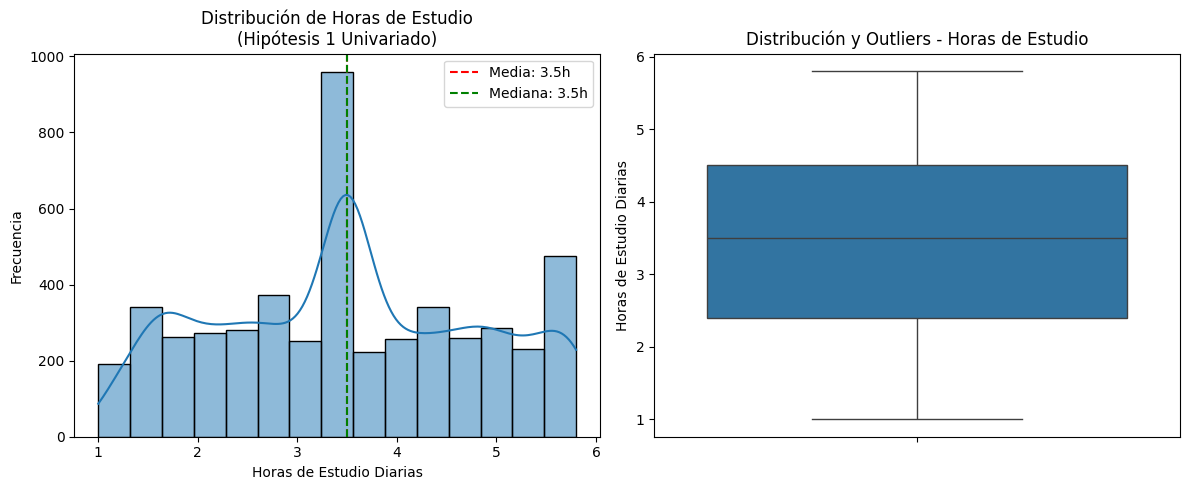

=== ESTADÍSTICAS HORAS DE ESTUDIO ===
Media: 3.50 horas
Mediana: 3.50 horas
Moda: 1.60 horas
Rango: 1.0 - 5.8 horas
Desviación estándar: 1.31 horas
Estudiantes en rango moderado (2-4h): 50.8%


In [250]:
# Análisis univariado - Horas de estudio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma con curva de densidad
sns.histplot(data=df_clean, x='study_hrs', bins=15, kde=True, ax=ax1)
ax1.axvline(df_clean['study_hrs'].mean(), color='red', linestyle='--', label=f'Media: {df_clean["study_hrs"].mean():.1f}h')
ax1.axvline(df_clean['study_hrs'].median(), color='green', linestyle='--', label=f'Mediana: {df_clean["study_hrs"].median():.1f}h')
ax1.set_xlabel('Horas de Estudio Diarias')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Horas de Estudio\n(Hipótesis 1 Univariado)')
ax1.legend()

# Boxplot para ver outliers y distribución
sns.boxplot(data=df_clean, y='study_hrs', ax=ax2)
ax2.set_ylabel('Horas de Estudio Diarias')
ax2.set_title('Distribución y Outliers - Horas de Estudio')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("=== ESTADÍSTICAS HORAS DE ESTUDIO ===")
print(f"Media: {df_clean['study_hrs'].mean():.2f} horas")
print(f"Mediana: {df_clean['study_hrs'].median():.2f} horas")
print(f"Moda: {df_clean['study_hrs'].mode().values[0]:.2f} horas")
print(f"Rango: {df_clean['study_hrs'].min():.1f} - {df_clean['study_hrs'].max():.1f} horas")
print(f"Desviación estándar: {df_clean['study_hrs'].std():.2f} horas")

# Porcentaje en rango moderado (2-4 horas)
moderate_study = df_clean[(df_clean['study_hrs'] >= 2) & (df_clean['study_hrs'] <= 4)].shape[0]
print(f"Estudiantes en rango moderado (2-4h): {moderate_study/len(df_clean)*100:.1f}%")

In [251]:
from scipy.stats import pearsonr

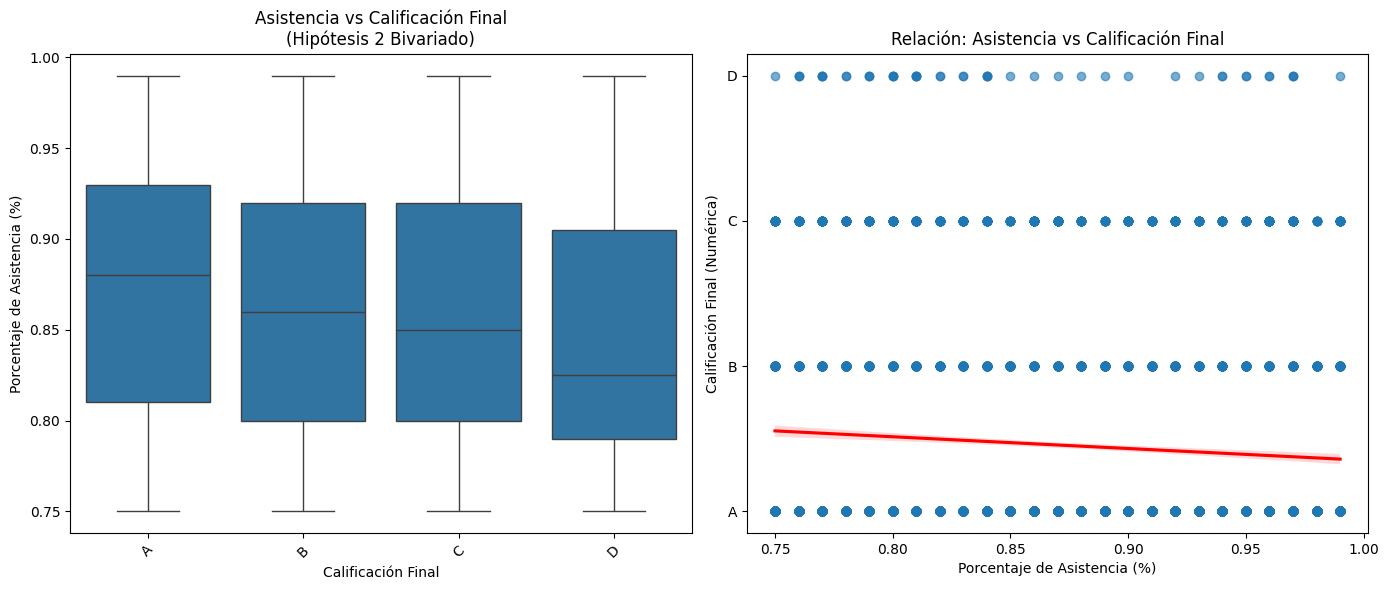


=== CORRELACIÓN ASISTENCIA vs CALIFICACIÓN ===
Correlación de Pearson: -0.082
Valor p: 0.000

Asistencia promedio por calificación:
  A: 0.9%
  B: 0.9%
  C: 0.9%
  D: 0.8%

Tendencia: Asistencia aumenta con mejor calificación: False


In [252]:
# Convertir final_grade a orden categórico si es necesario
grade_order = sorted(df_clean['final_grade'].unique())  # Ajustar según tus categorías

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot de Asistencia por Calificación Final
sns.boxplot(data=df_clean, x='final_grade', y='attendance', order=grade_order, ax=ax1)
ax1.set_xlabel('Calificación Final')
ax1.set_ylabel('Porcentaje de Asistencia (%)')
ax1.set_title('Asistencia vs Calificación Final\n(Hipótesis 2 Bivariado)')
ax1.tick_params(axis='x', rotation=45)

# SOLUCIÓN: Crear variable numérica para el scatter plot
# Mapear las calificaciones a valores numéricos
grade_mapping = {grade: i for i, grade in enumerate(grade_order)}
df_clean['final_grade_numeric'] = df_clean['final_grade'].map(grade_mapping)

# Scatter plot con línea de tendencia (usando la versión numérica)
sns.regplot(data=df_clean, x='attendance', y='final_grade_numeric', 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ax=ax2)

ax2.set_xlabel('Porcentaje de Asistencia (%)')
ax2.set_ylabel('Calificación Final (Numérica)')
ax2.set_title('Relación: Asistencia vs Calificación Final')
# Opcional: personalizar los labels del eje Y
ax2.set_yticks(range(len(grade_order)))
ax2.set_yticklabels(grade_order)

plt.tight_layout()
plt.show()

# Análisis estadístico básico
print("\n=== CORRELACIÓN ASISTENCIA vs CALIFICACIÓN ===")

# Calcular correlación usando la versión numérica
correlation, p_value = pearsonr(df_clean['attendance'], df_clean['final_grade_numeric'])
print(f"Correlación de Pearson: {correlation:.3f}")
print(f"Valor p: {p_value:.3f}")

# También mostrar promedios por grupo categórico
attendance_by_grade = df_clean.groupby('final_grade')['attendance'].mean()
print("\nAsistencia promedio por calificación:")
for grade, attendance in attendance_by_grade.items():
    print(f"  {grade}: {attendance:.1f}%")

# Análisis de tendencia
print(f"\nTendencia: Asistencia aumenta con mejor calificación: {correlation > 0}")

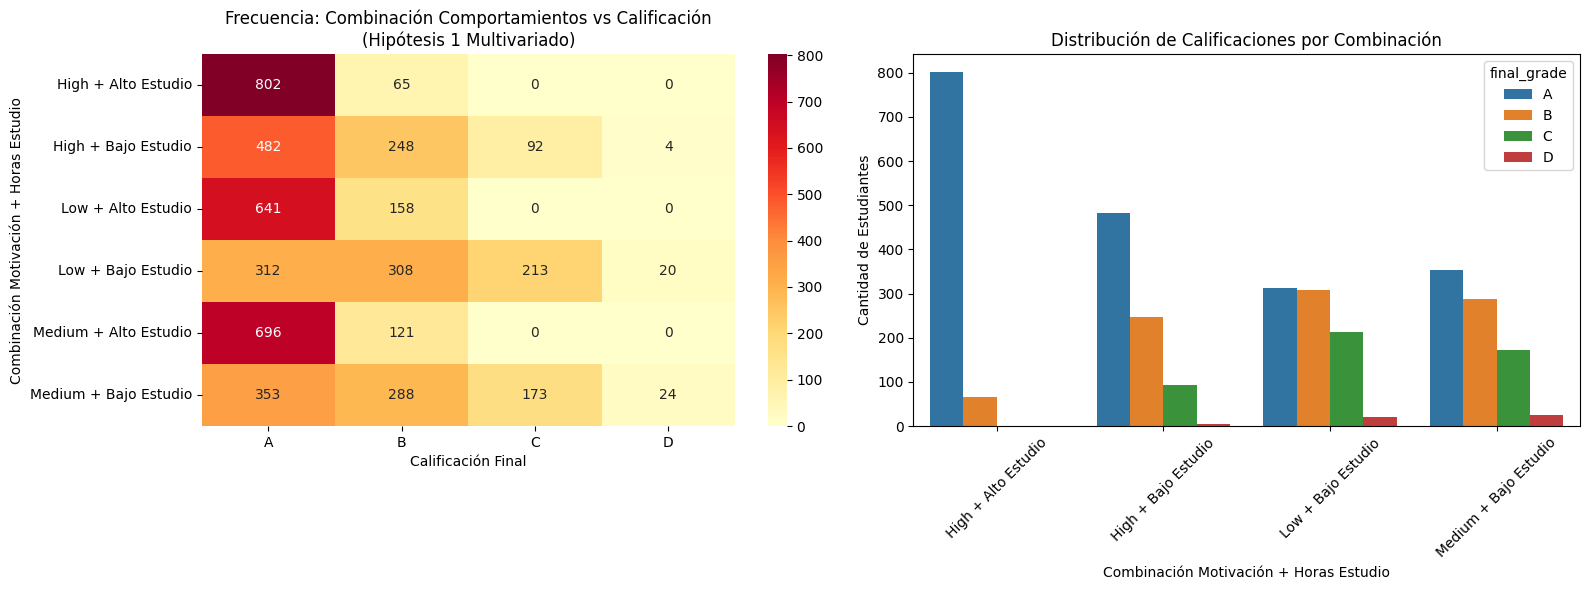


=== ANÁLISIS MULTIVARIADO ===
Top combinaciones con mejor rendimiento:
Comportamiento_Academico
High + Alto Estudio      A
High + Bajo Estudio      A
Low + Alto Estudio       A
Low + Bajo Estudio       A
Medium + Alto Estudio    A
Name: final_grade, dtype: object


In [253]:
df_clean['Comportamiento_Academico'] = df_clean['motivation'] + " + " + df_clean['study_hrs'].apply(
    lambda x: 'Alto Estudio' if x > df_clean['study_hrs'].median() else 'Bajo Estudio'
)

# Filtrar para mejor visualización
top_combinations = df_clean['Comportamiento_Academico'].value_counts().head(6).index
df_clean_filtered = df_clean[df_clean['Comportamiento_Academico'].isin(top_combinations)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap de frecuencias
pivot_data = df_clean_filtered.groupby(['Comportamiento_Academico', 'final_grade']).size().unstack(fill_value=0)
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='YlOrRd', ax=ax1)
ax1.set_xlabel('Calificación Final')
ax1.set_ylabel('Combinación Motivación + Horas Estudio')
ax1.set_title('Frecuencia: Combinación Comportamientos vs Calificación\n(Hipótesis 1 Multivariado)')

# Violin plot para distribución detallada
top_4_combinations = df_clean['Comportamiento_Academico'].value_counts().head(4).index
df_clean_top4 = df_clean[df_clean['Comportamiento_Academico'].isin(top_4_combinations)]

# Convertir final_grade a numérico para el violin plot si es necesario
# Si final_grade es categórico, podemos usar un countplot alternativo
if df_clean['final_grade'].dtype in ['float64', 'int64']:
    sns.violinplot(data=df_clean_top4, x='Comportamiento_Academico', y='final_grade', ax=ax2)
    ax2.set_ylabel('Calificación Final')
else:
    # Alternativa para final_grade categórico
    sns.countplot(data=df_clean_top4, x='Comportamiento_Academico', hue='final_grade', ax=ax2)
    ax2.set_ylabel('Cantidad de Estudiantes')

ax2.set_xlabel('Combinación Motivación + Horas Estudio')
ax2.set_title('Distribución de Calificaciones por Combinación')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análisis estadístico multivariado básico
print("\n=== ANÁLISIS MULTIVARIADO ===")
print("Top combinaciones con mejor rendimiento:")
best_combinations = df_clean.groupby('Comportamiento_Academico')['final_grade'].apply(
    lambda x: x.value_counts().index[0] if len(x) > 0 else 'N/A'
).sort_values()
print(best_combinations.head())